In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

# Issues with encoder zero calibration

The encoder zero calibration has worked in simulation but not on the real system.
One potential issue could be that I've not simulated encoder overflow in the simulation.


The simulation will be updated, but in this notebook I will try to find the encoder zero based on the loggs.


In [29]:
logfile = '../logger/logs/log_230507_1757.csv'
print(logfile)
df = pd.read_csv(logfile)

../logger/logs/log_230507_1757.csv


In [30]:
t = df['time_ms']*1/1000
t = np.array(t - t[0])
print("Total time")
t[-1]

Total time


20.784

In [32]:
# Extract signals
theta_enc = df['signal_0'].to_numpy()
theta_elec = df['signal_10'].to_numpy()

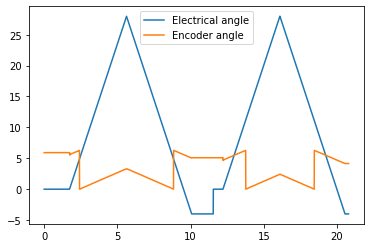

In [33]:
plt.plot(t,theta_elec,label='Electrical angle')
plt.plot(t,theta_enc,label='Encoder angle')
plt.legend()
a = 1

# Least squares estimate

In [66]:
# General function
def est_kxm(x1,y1):
    N = len(x1)
    M = np.c_[np.ones(N),x1]

    THETA = np.linalg.lstsq(M,y1,rcond=None)
    return THETA[0]

[-0.69971093  0.14340943]
[-0.69023655  0.14357166]
No polepairs 7
Offset [rad] -0.09928196276378184
Offset [deg] -5.688437448139694


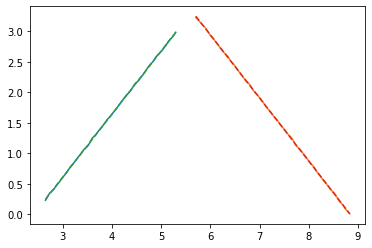

In [86]:
#range1 = np.arange(270,1100)
range1 = np.arange(330,660)
range2 = np.arange(710,1100)

plt.plot(t[range1],theta_enc[range1])
plt.plot(t[range2],theta_enc[range2])

th1 = est_kxm(theta_elec[range1],theta_enc[range1])
print(th1)

y1 = theta_elec[range1]*th1[1] + th1[0]
plt.plot(t[range1],y1,'--')

th2 = est_kxm(theta_elec[range2],theta_enc[range2])
print(th2)

y2 = theta_elec[range2]*th2[1] + th2[0]
plt.plot(t[range2],y2,'--')

n_polepairs_inv = (th1[1] + th2[1])*0.5
n_polepairs = int(np.round(1/n_polepairs_inv))

print('No polepairs',n_polepairs)

offset = (th1[0] + th2[0])*0.5
offset = offset*1/n_polepairs
print('Offset [rad]',offset)
print('Offset [deg]', np.rad2deg(offset))
